In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
#df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/galaxy-classification-using-ml/sdss_100k_galaxy_form_burst.csv',header=1)
df=pd.read_csv('sdss_100k_galaxy_form_burst.csv',header=1)
df.head()

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1237646587710669400,8175185722644649984,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,GALAXY,STARFORMING,0.067749,0.000015
1,1237646588247540577,8175186822156277760,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,GALAXY,STARFORMING,0.105118,0.000010
2,1237646588247540758,8175187097034184704,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,GALAXY,STARFORMING,0.234089,0.000030
3,1237648702973083853,332152325571373056,198.544469,-1.097059,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,...,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,GALAXY,STARFORMING,0.110825,0.000030
4,1237648702973149350,332154249716721664,198.706864,-1.046217,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,...,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,GALAXY,STARFORMING,0.136658,0.000021


In [9]:
df.shape

(100000, 43)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   objid         100000 non-null  int64  
 1   specobjid     100000 non-null  uint64 
 2   ra            100000 non-null  float64
 3   dec           100000 non-null  float64
 4   u             100000 non-null  float64
 5   g             100000 non-null  float64
 6   r             100000 non-null  float64
 7   i             100000 non-null  float64
 8   z             100000 non-null  float64
 9   modelFlux_u   100000 non-null  float64
 10  modelFlux_g   100000 non-null  float64
 11  modelFlux_r   100000 non-null  float64
 12  modelFlux_i   100000 non-null  float64
 13  modelFlux_z   100000 non-null  float64
 14  petroRad_u    100000 non-null  float64
 15  petroRad_g    100000 non-null  float64
 16  petroRad_i    100000 non-null  float64
 17  petroRad_r    100000 non-null  float64
 18  petro

In [11]:
df.isnull().sum()

objid           0
specobjid       0
ra              0
dec             0
u               0
g               0
r               0
i               0
z               0
modelFlux_u     0
modelFlux_g     0
modelFlux_r     0
modelFlux_i     0
modelFlux_z     0
petroRad_u      0
petroRad_g      0
petroRad_i      0
petroRad_r      0
petroRad_z      0
petroFlux_u     0
petroFlux_g     0
petroFlux_i     0
petroFlux_r     0
petroFlux_z     0
petroR50_u      0
petroR50_g      0
petroR50_i      0
petroR50_r      0
petroR50_z      0
psfMag_u        0
psfMag_r        0
psfMag_g        0
psfMag_i        0
psfMag_z        0
expAB_u         0
expAB_g         0
expAB_r         0
expAB_i         0
expAB_z         0
class           0
subclass        0
redshift        0
redshift_err    0
dtype: int64

In [12]:
df.describe()

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237659e+18,2.303595e+18,180.577802,23.472475,18.518622,17.258221,16.821739,16.362611,15.850865,30.683321,...,18.834259,18.020203,17.435735,-0.603667,-0.522111,-0.309462,-0.410153,-0.740964,0.116753,0.000179
std,6.103756e+12,2.531359e+18,75.751994,21.140744,105.082004,105.069066,95.035474,100.171155,114.206165,76.552859,...,105.079620,100.181687,114.218604,104.870665,104.871474,94.860919,99.991654,114.005927,0.100169,0.052189
min,1.237646e+18,2.994897e+17,0.008745,-11.244273,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-0.000833,0.000002
25%,1.237655e+18,8.130687e+17,138.741880,3.120118,18.762215,17.505868,16.898845,16.527097,16.281327,9.288132,...,19.257783,18.295627,17.991602,0.299999,0.398705,0.418789,0.418656,0.381288,0.055836,0.000008
50%,1.237659e+18,1.457564e+18,181.492972,20.913596,19.349715,18.072640,17.459080,17.091385,16.861105,18.195690,...,19.763915,18.845780,18.563315,0.508688,0.588335,0.604795,0.604254,0.575397,0.085850,0.000011
75%,1.237663e+18,2.367902e+18,223.851863,42.259965,20.079470,18.656182,17.926918,17.592650,17.453848,31.259628,...,20.408775,19.586577,19.299430,0.699907,0.768804,0.773924,0.773119,0.752311,0.135148,0.000015
max,1.237681e+18,1.412691e+19,359.997922,68.695258,30.960000,30.420980,31.173560,30.562360,28.553240,7915.306000,...,26.174400,25.966680,27.043280,1.000000,1.000000,0.999999,1.000000,0.999998,0.572899,16.503710


In [13]:
df_cleaned = df.replace(-9999.0,np.nan)
df_cleaned=df_cleaned.dropna()

In [14]:
df_cleaned

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1237646587710669400,8175185722644649984,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,GALAXY,STARFORMING,0.067749,0.000015
1,1237646588247540577,8175186822156277760,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,GALAXY,STARFORMING,0.105118,0.000010
2,1237646588247540758,8175187097034184704,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,GALAXY,STARFORMING,0.234089,0.000030
3,1237648702973083853,332152325571373056,198.544469,-1.097059,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,...,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,GALAXY,STARFORMING,0.110825,0.000030
5,1237648702973149360,332153425083000832,198.720675,-1.083876,19.47473,18.18575,17.52763,17.14837,16.89580,16.220930,...,18.23220,0.754158,0.767767,0.759105,0.742471,0.721491,GALAXY,STARFORMING,0.111458,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1237667782852804885,3130040850139080704,228.558321,16.759520,20.09288,18.25375,17.28985,16.82903,16.43054,9.177956,...,17.91477,0.283251,0.308447,0.318548,0.313944,0.361409,GALAXY,STARFORMING,0.116555,0.000022
99996,1237667783343867090,5077945562323769344,119.601880,10.351615,22.09939,20.82547,19.02462,18.43225,17.96795,1.432706,...,19.48296,0.050000,0.705830,0.772447,0.738316,0.611691,GALAXY,STARFORMING,0.366410,0.000093
99997,1237667783392755908,2834003941597931520,235.609200,15.242749,19.31622,18.14944,17.45517,17.04435,16.77127,18.770960,...,18.74449,0.406675,0.363766,0.367104,0.373286,0.389484,GALAXY,STARFORMING,0.127064,0.000010
99998,1237667783392821500,2834003391842117632,235.789986,15.189821,19.03856,18.17619,17.53119,17.05532,16.85166,24.241610,...,17.75661,0.937029,0.930673,0.884711,0.859936,0.873763,GALAXY,STARFORMING,0.116330,0.000011


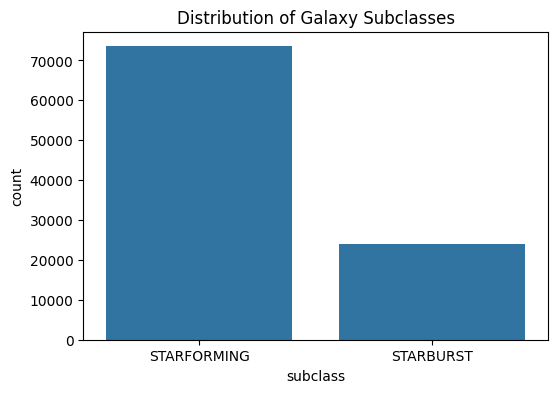

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='subclass')
plt.title('Distribution of Galaxy Subclasses')
plt.savefig('subclass_distribution.png')

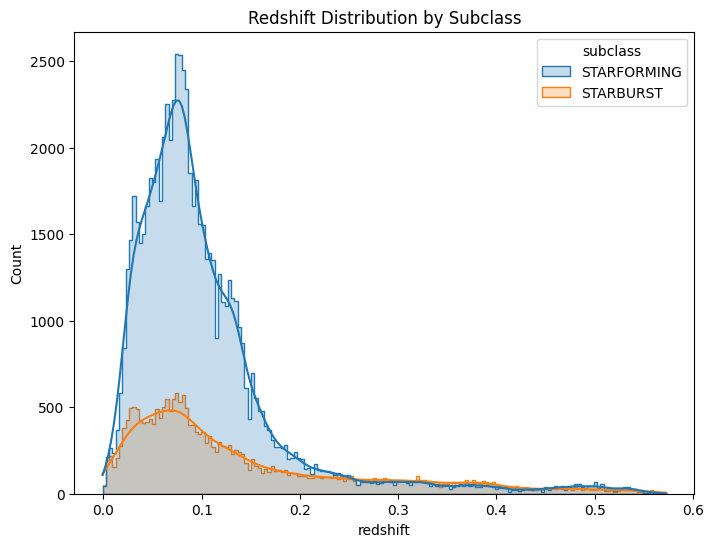

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, x='redshift', hue='subclass', kde=True, element="step")
plt.title('Redshift Distribution by Subclass')
plt.savefig('redshift_distribution.png')

In [17]:
drop_cols = ['objid', 'specobjid', 'class', 'subclass']
X = df_cleaned.drop(columns=drop_cols)
y = df_cleaned['subclass']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [20]:
le=LabelEncoder()
y_encoded=le.fit_transform(y)
class_names = le.classes_

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42), # Reduced estimators for speed
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

In [24]:
results = []

print("Training models...")
for name, model in models.items():
    print(f"Training {name}...")

    # Use scaled data for all for consistency, though tree-based don't strictly need it
    # It won't hurt tree models significantly in this context
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

Training models...
Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training K-Nearest Neighbors...



Model Comparison Results:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.876077   0.871871  0.876077  0.871373
1        Decision Tree  0.848892   0.849153  0.848892  0.849021
2        Random Forest  0.895158   0.893035  0.895158  0.893673
3    Gradient Boosting  0.885464   0.882015  0.885464  0.881764
4  K-Nearest Neighbors  0.855047   0.848892  0.855047  0.849333

Best Model: Random Forest
              precision    recall  f1-score   support

   STARBURST       0.81      0.75      0.78      4746
 STARFORMING       0.92      0.94      0.93     14750

    accuracy                           0.90     19496
   macro avg       0.86      0.84      0.85     19496
weighted avg       0.89      0.90      0.89     19496



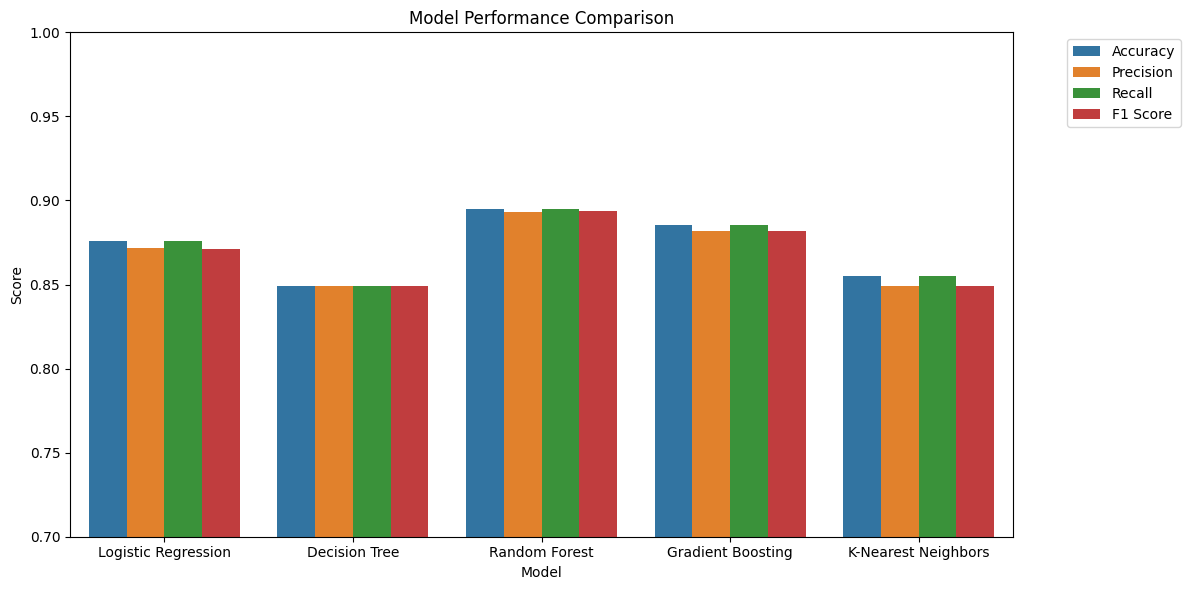

In [25]:
results_df = pd.DataFrame(results)
print("\nModel Comparison Results:")
print(results_df)

# 5. Visualization
plt.figure(figsize=(12, 6))
# Melt for easier plotting with seaborn
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric")
plt.title("Model Performance Comparison")
plt.ylim(0.7, 1.0) # Zoom in on the relevant range
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('model_comparison.png')

# Display specific class metrics for the best model (likely Gradient Boosting or RF)
best_model_name = results_df.sort_values(by="F1 Score", ascending=False).iloc[0]["Model"]
print(f"\nBest Model: {best_model_name}")
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_best, target_names=class_names))